# TD Ingénierie des Connaissances : Réseaux Sémantiques - AFIFI Saad IID3

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

def draw_semantic_network(G, title):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, k=0.9, seed=42)
    
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
    
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")
    
    plt.title(title, fontsize=16)
    plt.show()

## Exercice 1 : Oiseau, Mammifère et Chauve-souris

> **Faits :**
> * Un oiseau est un animal qui peut voler.
> * Un mammifère est un animal qui allaite ses petits.
> * Une chauve-souris est à la fois un mammifère et un oiseau.
> * Les chauves-souris ne pondent pas d’œufs.
>
> 1) Construisez le réseau sémantique.
> 2) Quelles propriétés la chauve-souris hérite-t-elle ?
> 3) Quels conflits apparaissent ?

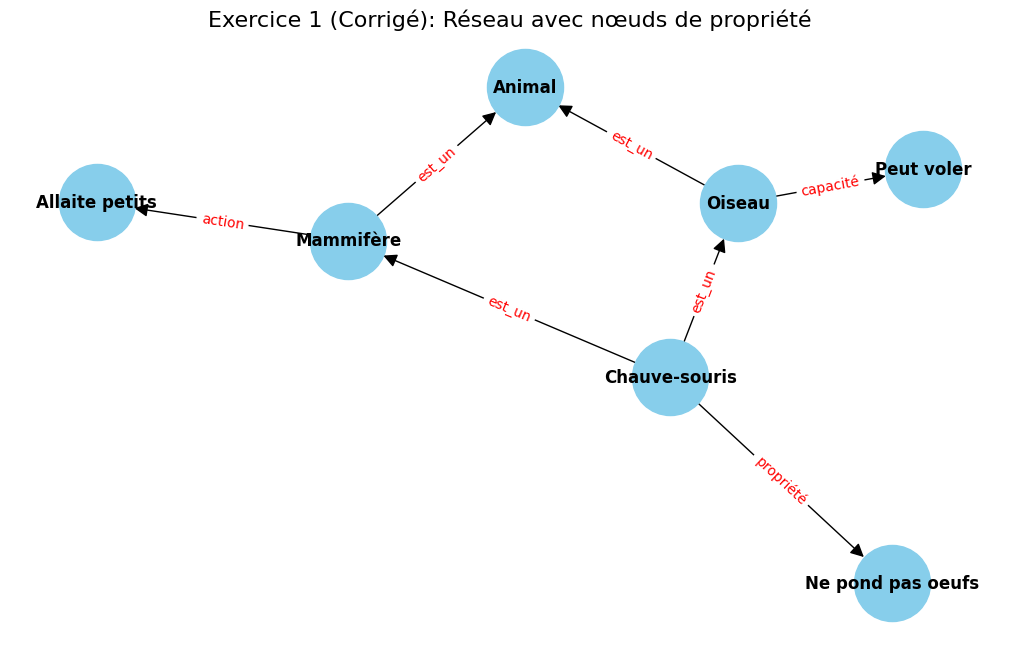

In [ ]:
G1_v2 = nx.DiGraph() 
nodes_v2 = [
    "Animal", "Oiseau", "Mammifère", "Chauve-souris",
    "Peut voler", "Allaite petits", "Ne pond pas oeufs"
]
G1_v2.add_nodes_from(nodes_v2)
G1_v2.add_edge("Oiseau", "Animal", label="est_un")
G1_v2.add_edge("Mammifère", "Animal", label="est_un")
G1_v2.add_edge("Chauve-souris", "Oiseau", label="est_un")
G1_v2.add_edge("Chauve-souris", "Mammifère", label="est_un")

G1_v2.add_edge("Oiseau", "Peut voler", label="capacité")
G1_v2.add_edge("Mammifère", "Allaite petits", label="action")
G1_v2.add_edge("Chauve-souris", "Ne pond pas oeufs", label="propriété") 

draw_semantic_network(G1_v2, "Exercice 1 (Corrigé): Réseau avec nœuds de propriété")

### 2) Propriétés héritées par la chauve-souris

La chauve-souris est connectée par des liens "est_un" à la fois à "Oiseau" et "Mammifère". Par le principe de l'héritage multiple, elle hérite des propriétés de tous ses super-concepts.

* De **Oiseau**, elle hérite la propriété : `peut_voler`.
* De **Mammifère**, elle hérite la propriété : `allaite_petits`.
* De **Animal** (par transitivité via Oiseau ou Mammifère), elle hérite la propriété (implicite) : `est_un_animal`.

En plus de ses propriétés héritées, elle possède sa propriété locale : `ne_pond_pas_oeufs`.

### 3) Conflits apparents

Un conflit d'héritage survient lorsque des propriétés héritées de différents parents sont contradictoires.

1.  **Conflit implicite** : Les oiseaux pondent des œufs.  La chauve-souris ne pondent pas. Comment résoudre ?
    * **Résolution** : l'ajoute d'une exclusion

---

## Exercice 2 : Dauphins et Poissons

> **Règles :**
> * Tous les poissons vivent dans l’eau.
> * Tous les animaux qui vivent dans l’eau peuvent nager.
> * Les dauphins sont des mammifères.
> * Les mammifères sont des animaux.
> * Les dauphins vivent dans l’eau.
>
> En utilisant uniquement le réseau sémantique et la propagation d’héritage, démontrez que les dauphins peuvent nager.

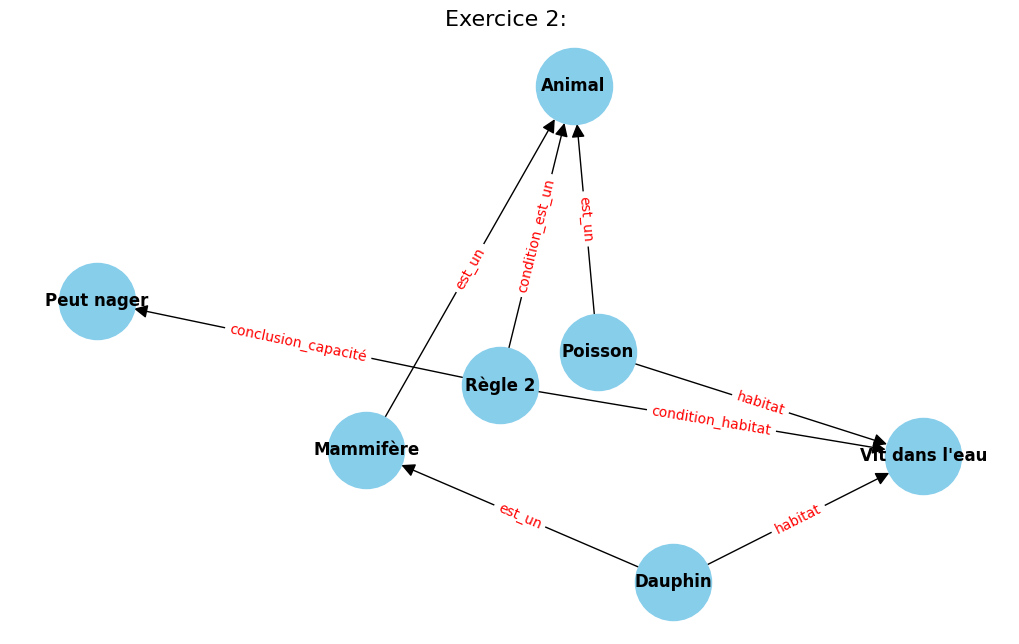

In [13]:
G2_final = nx.DiGraph()

nodes_g2_final = [
    "Animal", "Dauphin", "Mammifère", "Poisson",
    "Vit dans l'eau", "Peut nager",
    "Règle 2"
]
G2_final.add_nodes_from(nodes_g2_final)

G2_final.add_edge("Poisson", "Animal", label="est_un")
G2_final.add_edge("Poisson", "Vit dans l'eau", label="habitat")
G2_final.add_edge("Dauphin", "Mammifère", label="est_un")

G2_final.add_edge("Dauphin", "Vit dans l'eau", label="habitat")
G2_final.add_edge("Mammifère", "Animal", label="est_un")

G2_final.add_edge("Règle 2", "Animal", label="condition_est_un")
G2_final.add_edge("Règle 2", "Vit dans l'eau", label="condition_habitat")
G2_final.add_edge("Règle 2", "Peut nager", label="conclusion_capacité")

# Visualisation
draw_semantic_network(G2_final, "Exercice 2: ")

### Démonstration par propagation d'héritage

Nous devons trouver la propriété `peut_nager` pour le nœud **Dauphin**.

La règle clé est la Règle 2 : **"Tous les animaux qui vivent dans l’eau peuvent nager."**
Pour qu'un objet (comme "Dauphin") puisse nager, il doit satisfaire deux conditions :
1.  Être un `Animal`.
2.  Avoir la propriété `vit_dans_eau`.

Vérifions ces conditions pour "Dauphin" en utilisant le réseau :

**Condition 1 : Le dauphin est-il un animal ?**
* Fait (Règle 3) : `Dauphin` **est_un** `Mammifère`.
* Fait (Règle 4) : `Mammifère` **est_un** `Animal`.
* **Propagation d'héritage (Transitivité)** : Si A est_un B, et B est_un C, alors A est_un C.
* **Conclusion** : `Dauphin` **est_un** `Animal`. **La condition 1 est validée.**

**Condition 2 : Le dauphin vit-il dans l'eau ?**
* Fait (Règle 5) : `Dauphin` a la propriété (locale) `vit_dans_eau`.
* **Conclusion** : **La condition 2 est validée.**

**Démonstration finale :**

Puisque le `Dauphin` satisfait les deux prémisses de la Règle 2 (il **est_un** `Animal` ET il `vit_dans_eau`), il hérite de la conclusion de cette règle.

**Par conséquent, le Dauphin `peut_nager`.**

---

## Exercice 3 : Personne, Étudiant, Enseignant

> **On veut représenter :**
> * Une personne possède un âge (valeur numérique).
> * Un étudiant est une personne qui étudie un domaine.
> * Un enseignant est une personne qui enseigne un domaine.
> * Un professeur est à la fois enseignant et chercheur.
> * Le domaine enseigné doit être le même que le domaine étudié pour un même cours.
>
> 1) Construisez le réseau (nœuds, liens, types).
> 2) Identifiez le type de contrainte.

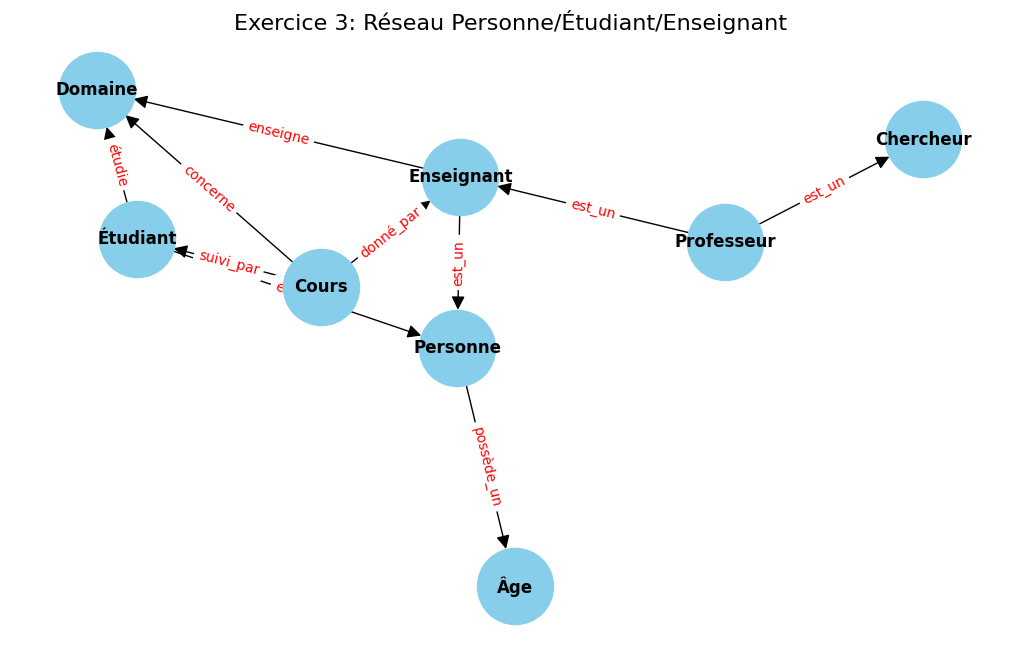

In [ ]:
G3 = nx.DiGraph()

nodes = ["Personne", "Enseignant", "Étudiant", "Professeur", "Chercheur", "Domaine", "Cours", "Âge"]
G3.add_nodes_from(nodes)

G3.add_edge("Étudiant", "Personne", label="est_un")
G3.add_edge("Enseignant", "Personne", label="est_un")
G3.add_edge("Professeur", "Enseignant", label="est_un")
G3.add_edge("Professeur", "Chercheur", label="est_un")

G3.add_edge("Personne", "Âge", label="possède_un")
G3.add_edge("Étudiant", "Domaine", label="étudie")
G3.add_edge("Enseignant", "Domaine", label="enseigne")

G3.add_edge("Cours", "Enseignant", label="donné_par")
G3.add_edge("Cours", "Étudiant", label="suivi_par")
G3.add_edge("Cours", "Domaine", label="concerne")

draw_semantic_network(G3, "Exercice 3: Réseau Personne/Étudiant/Enseignant")

### 2) Identification du type de contrainte

> *Le domaine enseigné doit être le même que le domaine étudié pour un même cours.*

Ce type de contrainte est une **contrainte d'intégrité structurelle** ou une **contrainte procédurale**.

**Explication :**

Ce n'est pas une simple contrainte de type (ex: "l'âge doit être numérique"). C'est une contrainte qui **relie les propriétés de plusieurs nœuds (instances) différents** qui sont eux-mêmes liés par un troisième nœud (l'instance de `Cours`).

---

## Exercice 4 : Propagation d'activation

> **Réseau :**
> * Chien → est un → Animal
> * Chat → est un → Animal
> * Animal → est un → ÊtreVivant
> * Chien → lié À → Os
> * Chat → lié À → Lait
> * Os → type → Nourriture
>
> On active initialement le nœud Chien.
> Appliquez une propagation d’activation (niveau = 3, facteur = 0.5).

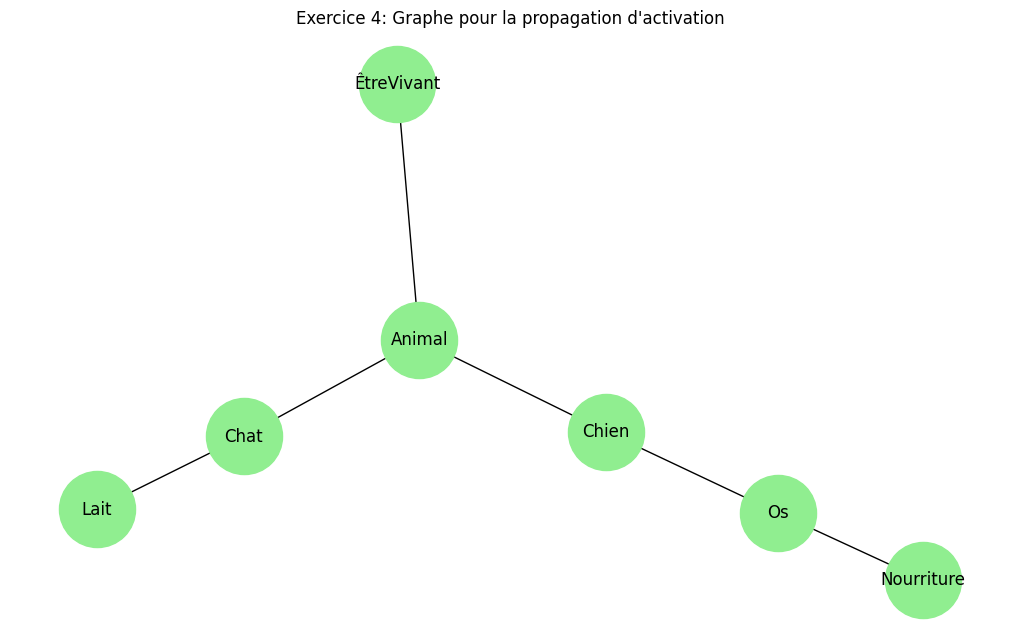

--- Début de la propagation depuis 'Chien' (Facteur=0.5) ---
Niveau 0: 'Chien' activé à 1.0

Niveau 1 (propagation depuis 'Chien' avec 0.5000):
  -> 'Animal' reçoit 0.5000. Total = 0.5000
  -> 'Os' reçoit 0.5000. Total = 0.5000

Niveau 2 (propagation depuis 'Animal' avec 0.2500):
  -> 'Chat' reçoit 0.2500. Total = 0.2500
  -> 'ÊtreVivant' reçoit 0.2500. Total = 0.2500

Niveau 2 (propagation depuis 'Os' avec 0.2500):
  -> 'Chien' reçoit 0.2500. Total = 1.2500
  -> 'Nourriture' reçoit 0.2500. Total = 0.2500

Niveau 3 (propagation depuis 'Chat' avec 0.1250):
  -> 'Animal' reçoit 0.1250. Total = 0.6250
  -> 'Lait' reçoit 0.1250. Total = 0.1250

Niveau 3 (propagation depuis 'ÊtreVivant' avec 0.1250):

Niveau 3 (propagation depuis 'Chien' avec 0.1250):
  -> 'Os' reçoit 0.1250. Total = 0.6250

Niveau 3 (propagation depuis 'Nourriture' avec 0.1250):

--- Propagation Terminée --- Bilan final des activations ---
{'Chien': 1.25, 'Animal': 0.625, 'Chat': 0.25, 'ÊtreVivant': 0.25, 'Os': 0.625, 'Lai

In [ ]:
G4 = nx.Graph()
G4.add_edges_from([
    ("Chien", "Animal"),
    ("Chat", "Animal"),
    ("Animal", "ÊtreVivant"),
    ("Chien", "Os"),
    ("Chat", "Lait"),
    ("Os", "Nourriture")
])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G4, seed=42)
nx.draw(G4, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=12)
plt.title("Exercice 4: Graphe pour la propagation d'activation")
plt.show()

def propagate_activation(graph, start_node, max_level, factor):
    activations = {node: 0.0 for node in graph.nodes()}
    activations[start_node] = 1.0
    
    queue = [(start_node, 0, 1.0)]
    
    visited_at_level = {i: set() for i in range(max_level + 1)}
    
    print(f"--- Début de la propagation depuis '{start_node}' (Facteur={factor}) ---")
    print(f"Niveau 0: '{start_node}' activé à {activations[start_node]}")
    
    processed = 0
    while processed < len(queue) and queue[processed][1] < max_level:
        current_node, current_level, current_activation = queue[processed]
        processed += 1
        
        new_level = current_level + 1
        activation_to_propagate = current_activation * factor
        
        if new_level > max_level:
            continue
            
        print(f"\nNiveau {new_level} (propagation depuis '{current_node}' avec {activation_to_propagate:.4f}):")
        
        for neighbor in graph.neighbors(current_node):
            if new_level > 1 and neighbor == queue[processed-2][0]: 
                continue
            
            if neighbor not in visited_at_level[new_level]:
                activations[neighbor] += activation_to_propagate
                queue.append((neighbor, new_level, activation_to_propagate))
                visited_at_level[new_level].add(neighbor)
                print(f"  -> '{neighbor}' reçoit {activation_to_propagate:.4f}. Total = {activations[neighbor]:.4f}")

    print("\n--- Propagation Terminée --- Bilan final des activations ---")
    
    final_activations = {node: val for node, val in activations.items() if val > 0}
    return final_activations

# Exécution
final_activations = propagate_activation(G4, "Chien", 3, 0.5)
print(final_activations)

---

## Exercice 5 : Héritage avec exceptions (Pingouin et Hibou)

> **Faits :**
> * Les oiseaux peuvent voler.
> * Les oiseaux nocturnes chassent la nuit.
> * Les hiboux sont des oiseaux nocturnes.
> * Les pingouins sont des oiseaux mais ne volent pas.
> * Les hiboux ne vivent pas dans l’eau.
>
> Déterminez pour Pingouin et Hibou les propriétés héritées finales.

Pour cet exercice, la modélisation la plus claire est l'utilisation des classes Python, qui implémentent naturellement l'héritage et la surcharge (exceptions).

In [ ]:
class Oiseau:
    est_un_oiseau = True
    peut_voler = True 

class OiseauNocturne(Oiseau): 
    est_un_oiseau_nocturne = True
    chasse_la_nuit = True

class Hibou(OiseauNocturne):
    vit_dans_eau = False

class Pingouin(Oiseau): 
    peut_voler = False


print("--- Analyse du Pingouin ---")
p = Pingouin()
print(f"Est un oiseau ? {p.est_un_oiseau}") 
print(f"Peut voler ? {p.peut_voler}")   

print("\n--- Analyse du Hibou ---")
h = Hibou()
print(f"Est un oiseau ? {h.est_un_oiseau}")       
print(f"Est un oiseau nocturne ? {h.est_un_oiseau_nocturne}") 
print(f"Peut voler ? {h.peut_voler}")                 
print(f"Chasse la nuit ? {h.chasse_la_nuit}")         
print(f"Vit dans l'eau ? {h.vit_dans_eau}")           

--- Analyse du Pingouin ---
Est un oiseau ? True
Peut voler ? False

--- Analyse du Hibou ---
Est un oiseau ? True
Est un oiseau nocturne ? True
Peut voler ? True
Chasse la nuit ? True
Vit dans l'eau ? False


---

## Exercice 6 : Traduction Logique → Réseau Sémantique

> **Traduisez en réseau sémantique :**
> * (∀x) Étudiant(x) → Personne(x)
> * (∀x) Étudiant(x) → ¬Travailleur(x)
> * Étudiant(Ali)

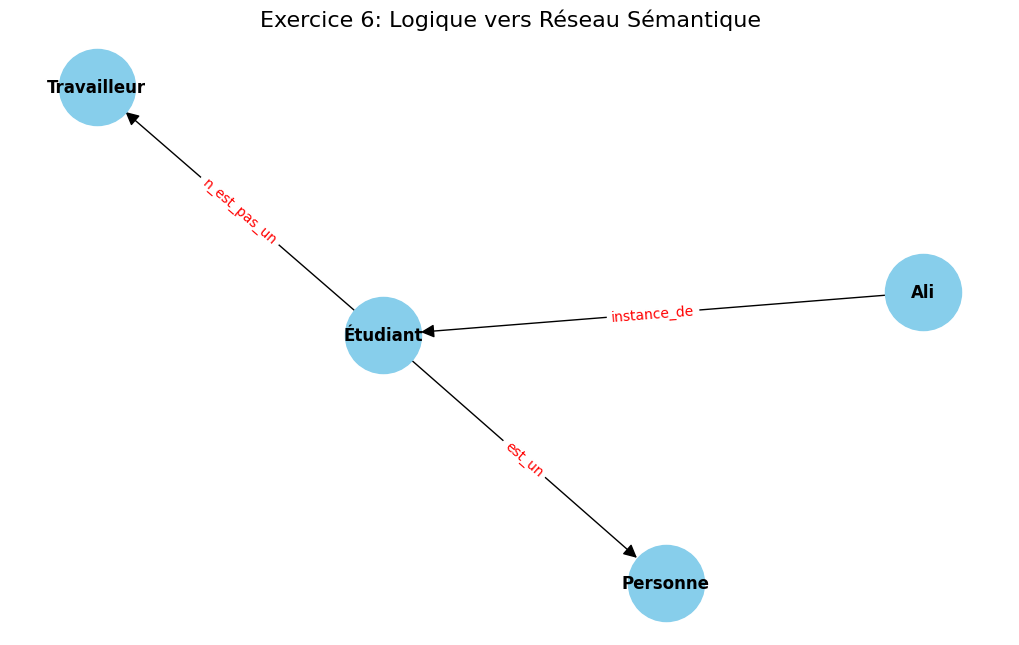

In [ ]:
G6 = nx.DiGraph()
G6.add_nodes_from(["Ali", "Étudiant", "Personne", "Travailleur"])
G6.add_edge("Étudiant", "Personne", label="est_un")
G6.add_edge("Étudiant", "Travailleur", label="n_est_pas_un") 
G6.add_edge("Ali", "Étudiant", label="instance_de")

draw_semantic_network(G6, "Exercice 6: Logique vers Réseau Sémantique")

### Analyse du réseau

Le réseau représente visuellement les relations logiques :

1.  **`Ali --instance_de--> Étudiant`** : Ali est une instance de la classe Étudiant.
2.  **`Étudiant --est_un--> Personne`** : La classe Étudiant est une sous-classe de Personne.
3.  **`Étudiant --n_est_pas_un--> Travailleur`** : Il s'agit d'un lien d'exclusion. Les classes Étudiant et Travailleur sont disjointes.

Par héritage, on peut déduire de nouvelles informations sur Ali :
* Puisque `Ali` est une instance de `Étudiant`, et `Étudiant` **est_un** `Personne`, on déduit que `Ali` est (implicitement) une instance de `Personne`.
* Puisque `Ali` est une instance de `Étudiant`, et `Étudiant` **n_est_pas_un** `Travailleur`, on déduit que `Ali` **n_est_pas_un** `Travailleur`.

---

## Exercice 7 : Réseau médical

> **Réseau :**
> * Fièvre → symptôme → Maladie
> * Toux → symptôme → MaladieRespiratoire
> * Grippe → isa → MaladieRespiratoire
> * Grippe → hasSymptom → Fièvre, Toux
> * Pneumonie → isa → MaladieRespiratoire
> * Pneumonie → hasSymptom → Fièvre, DouleurPoitrine
>
> Si un patient présente fièvre + toux, quelles maladies sont possibles ?

Pour cet exercice, nous n'avons pas besoin de `networkx`. Une simple structure de données (dictionnaire) représentant la base de connaissances des maladies est plus efficace pour l'inférence.

In [ ]:
knowledge_base = {
    "Grippe": {"Fièvre", "Toux"},
    "Pneumonie": {"Fièvre", "DouleurPoitrine"}
}

patient_symptoms = {"Fièvre", "Toux"}

print(f"Symptômes du patient: {patient_symptoms}\n")

def find_possible_diseases(symptoms, db):
    possible_diseases = []
    
    for disease, disease_symptoms in db.items():
        if disease_symptoms == symptoms:
            print(f"-> Correspondance exacte trouvée pour: {disease}")
            possible_diseases.append((disease, "Correspondance exacte"))
        
        elif disease_symptoms.issubset(symptoms):
            print(f"-> Correspondance (sous-ensemble) trouvée pour: {disease}")
            possible_diseases.append((disease, "Correspondance (tous les symptômes de la maladie sont présents)"))
        
        elif symptoms.issubset(disease_symptoms):
            print(f"-> Correspondance partielle (symptômes manquants) pour: {disease}")
            possible_diseases.append((disease, "Correspondance partielle (symptômes manquants)"))
            
        elif symptoms.intersection(disease_symptoms):
            print(f"-> Correspondance partielle (intersection) pour: {disease}")
            possible_diseases.append((disease, f"Correspondance partielle (symptôme(s) en commun: {symptoms.intersection(disease_symptoms)})"))

    return possible_diseases

diseases = find_possible_diseases(patient_symptoms, knowledge_base)

print("\n--- Diagnostic --- ")
if not diseases:
    print("Aucune maladie correspondante trouvée dans la base de connaissances.")
else:
    for d, reason in diseases:
        if reason == "Correspondance exacte":
            print(f"La maladie la plus probable est: {d} ({reason})")

Symptômes du patient: {'Fièvre', 'Toux'}

-> Correspondance exacte trouvée pour: Grippe
-> Correspondance partielle (intersection) pour: Pneumonie

--- Diagnostic --- 
La maladie la plus probable est: Grippe (Correspondance exacte)


### Analyse et Réponse

L'objectif est de faire correspondre les symptômes du patient (`Fièvre`, `Toux`) aux définitions des maladies dans le réseau.

1.  **Analyse de la Grippe (`Grippe`) :**
    * La Grippe `hasSymptom` : `Fièvre`, `Toux`.
    * Les symptômes du patient sont : `Fièvre`, `Toux`.
    * **Résultat : Correspondance exacte.** Les symptômes du patient correspondent parfaitement à la définition de la Grippe.

2.  **Analyse de la Pneumonie (`Pneumonie`) :**
    * La Pneumonie `hasSymptom` : `Fièvre`, `DouleurPoitrine`.
    * Les symptômes du patient sont : `Fièvre`, `Toux`.
    * **Résultat : Correspondance partielle.** Le patient a la `Fièvre` (symptôme commun), mais il a aussi une `Toux` (non listée pour la Pneumonie) et n'a pas la `DouleurPoitrine` (listée pour la Pneumonie).

3.  **Analyse des classes supérieures (`MaladieRespiratoire`) :**
    * La `Toux` est un symptôme de `MaladieRespiratoire`. La `Fièvre` est un symptôme de `Maladie` (encore plus général).
    * La Grippe et la Pneumonie sont toutes deux des `MaladieRespiratoire`. Le fait que le patient ait de la toux confirme qu'il s'agit d'une maladie respiratoire, mais cela ne discrimine pas entre la Grippe et la Pneumonie.

**Conclusion :**

En se basant sur la règle de **correspondance exacte** (où l'ensemble des symptômes du patient correspond parfaitement à l'ensemble des symptômes de la maladie), la maladie la plus probable est la **Grippe**.